# Reinforcement Learning algorithms
## Q Learning
![](http://www.ahuskylife.ca/wp-content/uploads/2012/08/intermittent-rewards.png)

##### Summary
1. Theory behind Q-Learning
2. Environment
3. Implementation

###### RL references

- [Udemy course on RL](https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python/)  
- [Deep Reinforcement Learning: Pong from Pixels](http://karpathy.github.io/2016/05/31/rl/) Andrej Karpathy's blog article on RL (always a reference)
- [Davild Silver course on RL at UCL](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html)
- [Berkeley course on AI](http://ai.berkeley.edu/lecture_slides.html)

##### Q Learning references
- [Q Learning tutorial by Arthur Juliani](https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0)

##### Libraries

In [2]:
# Usual
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm
sys.path.append("C:/git/machine-learning/")

# Autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
% matplotlib inline

# Seaborn config
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

# Deep Learning (Keras, Tensorflow)
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop, Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D,ZeroPadding2D,Conv2D
from keras.utils.np_utils import to_categorical

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***
# Theory behind Q Learning
## Introduction

## Markov Decision Processes (MDP)
##### Description
// TBD
##### Q, the action-value function
// TBD

## Bellmann equation
// Refaire l'équation pour Q

## Q-Learning
https://en.wikipedia.org/wiki/Q-learning

##### What is Q-Learning ? 
The Q-Learning algorithm is : 
- **Model Free**, that means that we have no prior knowledge of the MDP transitions and rewards, we just execute the policy and learn from experience
- A **control** problem : taking actions in the environment
- **Online planning** : we actually take actions in the world without planning beforehand


##### Equation
Q-Learning is the process of solving the Bellmann Optimality Equation for $q_*(s,a)$ (the optimal action-value function)
$$Q(s,a) = r + \gamma(max(Q(s',a'))$$

Otherwise said, the Q-action-value for a given state (s) and action (a) is the current reward (r) plus the discounted expectation of future rewards if we choose the best action (a') at the next state (s') 


##### Q-Learning Control Algorihtm

$$Q(s,a) \leftarrow Q(s,a) + \alpha (r + \gamma maxQ(s',a') - Q(s,a))$$

Or as a running average, 
$$Q(s,a) \leftarrow (1-\alpha)Q(s,a) + \alpha (r + \gamma maxQ(s',a'))$$


##### Properties
The above equation converges to optimal policy ! <br>
However : 
 - You have to explore enough
 - The learning rate must be slow enough (it is then very slow)

***
# Environment

In [4]:
from ai.rl.cooling_center import CoolingCenter

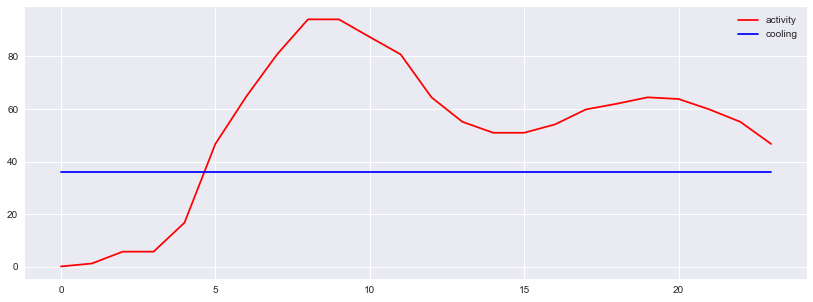

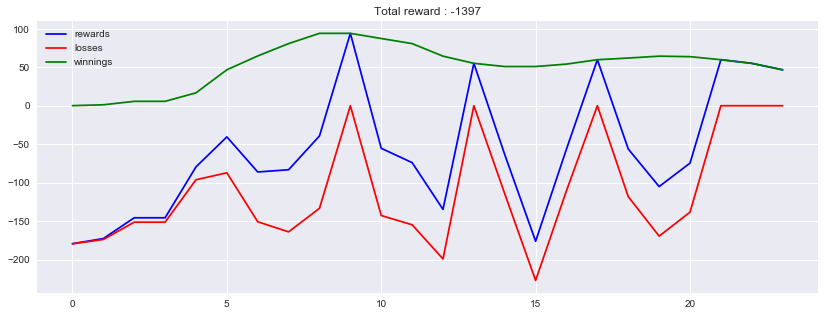

In [38]:
env = CoolingCenter(levels_cooling=50)
env.render()

***
# Implementation

##### Define a Q-Table
// Expliquer l'association Q(s,a) -> matrice

In [39]:
def initialize_Q_table(states,actions):
    return np.zeros([states,actions])

Q = initialize_Q_table(len(env.observation_space),len(env.action_space))
Q

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
     

In [40]:
def run_episode(env,Q,max_step = 100,episode_number = 0,lr = 0.8,gamma = 0.95,verbose = 1):
    s = env.reset()
    
    episode_reward = 0
    
    i = 0
    while i < max_step:
        
        # Choose an action
        q = Q[s,:]+ np.random.randn(1,len(env.action_space)) * 0.01* (1./(episode_number + 1))
        a = np.argmax(q)
        
        # Take the action, and get the reward from environment
        s_new,r,done = env.step(a)
        
        
        if verbose: print(s_new,r,done)
        
        # Update our knowledge in the Q-table
        Q[s,a] = (1-lr)*Q[s,a] + lr*(r-gamma*np.max(Q[s_new,:]))
        
        # Update the caches
        episode_reward += r
        s = s_new
        
        # If the episode is terminated
        i += 1
        if done:
            break
            
    return Q,episode_reward,env

In [41]:
def run_n_episodes(env,n_episodes = 2000,lr = 0.8,gamma = 0.95):
    
    # Initialize the Q-table
    Q = initialize_Q_table(len(env.observation_space),len(env.action_space))
    
    # Store the rewards
    rewards = []
    
    # Experience replay
    for i in tqdm(range(n_episodes)):
        
        # Run the episode
        Q,episode_reward,env_temp = run_episode(env,Q,episode_number=i,lr = lr,gamma = gamma,verbose = 0)
        rewards.append(episode_reward)
        
    
    # Plot rewards
    average_running_rewards = np.cumsum(rewards)/np.array(range(1,len(rewards)+1))
    plt.figure(figsize = (15,4))
    plt.plot(average_running_rewards)
    plt.show()
        
    return Q,rewards
        

100%|█████████████████████████████████████| 2000/2000 [00:02<00:00, 718.39it/s]


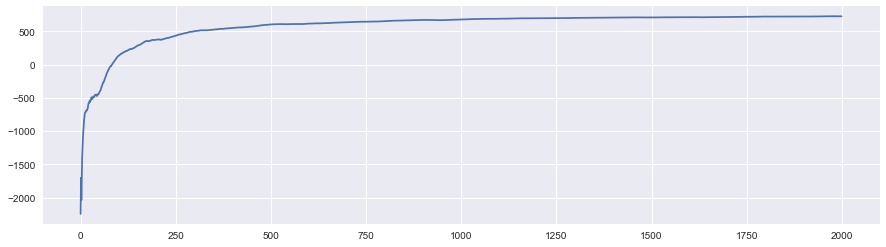

In [51]:
Q,rewards = run_n_episodes(env,n_episodes=2000,lr = 0.1)

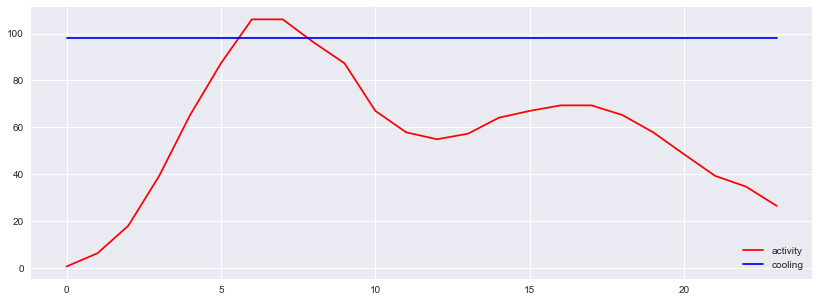

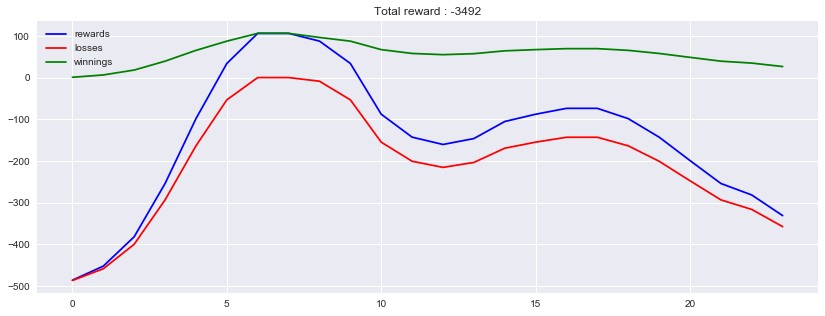

In [52]:
env.reset()
env.render()

In [53]:
env.cooling

array([[98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98,
        98, 98, 98, 98, 98, 98, 98]])

In [54]:
Q_temp,r,env = run_episode(env,Q,episode_number=200,verbose = True)

1 -9.47109200611 False
2 -32.7404438487 False
2 -45.7225643095 False
3 -45.7225643095 False
5 -39.5588215653 False
15 46.705927051 False
17 58.3330568596 False
19 44.7982850672 False
19 94.1172285777 False
18 94.1172285777 False
17 34.4400516316 False
14 44.7982850672 False
9 46.675190416 False
7 10.7979524817 False
7 50.9568361572 False
8 50.9568361572 False
11 54.1407263708 False
12 -120.96739585 False
14 42.0139262644 False
13 46.675190416 False
11 52.9018040874 False
9 59.8387673583 False
5 10.7979524817 False
0 46.705927051 True


In [55]:
env.cooling

array([[ 2,  8, 16, 16, 28, 40, 66, 88, 94, 94, 98, 88, 68, 64, 44, 44, 52,
        96, 66, 68, 66, 36, 64, 40]])

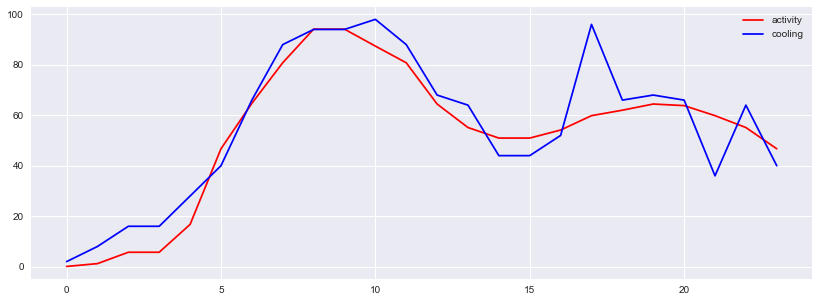

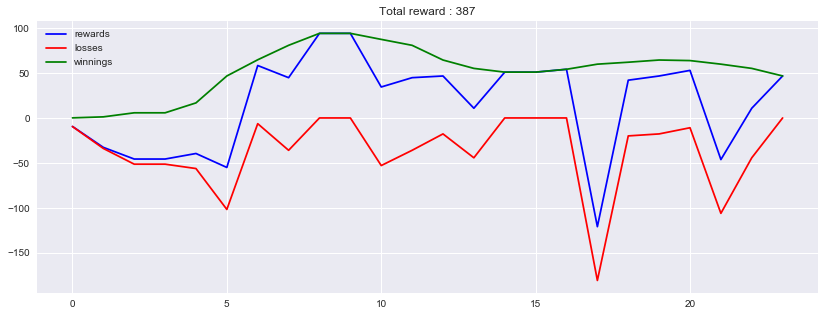

In [57]:
env.render()